In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

from env import get_db_url
import wrangle as w
import prepare as p
import matplotlib as mpl
mpl.rcParams["axes.formatter.useoffset"] = False
#import sklearn mean_square_error
from sklearn.metrics import mean_squared_error
#import r2_score from sklearn
from sklearn.metrics import r2_score
import sklearn.preprocessing

### 1. Load your zillow dataset.



In [2]:
df = w.get_zillow_2017
df = w.wrangle_zillow()
w.check_columns(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,dtype
6,county,3,"[LA, Orange, Ventura]",0,object
0,bedrooms,19,"[4, 3, 0, 5, 2, 1, 6, 7, 8, 9, 25, 10, 11, 14,...",0,int64
1,bathrooms,38,"[2.0, 4.0, 0.0, 1.0, 2.5, 3.5, 3.0, 5.5, 4.5, ...",0,float64
4,year_built,153,"[2005, 2011, 1926, 1972, 1973, 1960, 1950, 195...",0,int64
2,finished_area,10557,"[3633, 1620, 2077, 1200, 171, 203, 1244, 1300,...",0,int64
3,tax_value,588178,"[296425, 847770, 646760, 5328, 6920, 14166, 16...",0,int64
5,tax_amount,915868,"[6941.39, 10244.94, 7924.68, 91.6, 255.17, 163...",0,float64


In [3]:
df.head(3)

,bedrooms,bathrooms,finished_area,tax_value,year_built,tax_amount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA


In [4]:
df = df.drop(columns=['county'])

In [5]:
df.head()

,bedrooms,bathrooms,finished_area,tax_value,year_built,tax_amount
4,4,2.0,3633,296425,2005,6941.39
6,3,4.0,1620,847770,2011,10244.94
7,3,2.0,2077,646760,1926,7924.68
11,0,0.0,1200,5328,1972,91.60
14,0,0.0,171,6920,1973,255.17


In [6]:
train, validate, test = w.split_continuous(df)

Train: 0.5599997196569536
Validate: 0.24000028034304643
Test: 0.2


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.





In [15]:
train.drop(columns=['bedrooms', 'bathrooms', 'year_built', 'tax_amount'])

,finished_area,tax_value
1937068,2154,910679
1201703,1224,66845
751562,2358,247161
235077,1513,70917
1991181,2004,711410
...,...,...
1623860,1461,63411
632529,2546,472017
2013671,1195,234096
588048,1706,151008


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
mms=MinMaxScaler()

train['finished_area'] = mms.fit_transform(train[['finished_area']])

In [28]:
X_train = train[['finished_area']]
y_train = train.tax_value

X_validate = validate[['finished_area']]
y_validate = validate.tax_value

X_test = test[['finished_area']]
y_test = test.tax_value

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression().fit(X_train, y_train)

predictions = model.predict(X_train)

In [31]:
train['yhat'] = predictions

Modify and add to the code above as necessary for it to work with the zillow dataset.



### 3. Plot the residuals for the linear regression model that you made.



In [32]:
train['residuals'] = train.tax_value - train.yhat

In [33]:
train.head()

,bedrooms,bathrooms,finished_area,tax_value,year_built,tax_amount,yhat,residuals
1937068,4,2.5,0.002260,910679,2001,11079.60,528076.989366,382602.010634
1201703,3,2.0,0.001284,66845,1952,1198.53,309641.840567,-242796.840567
751562,4,3.0,0.002474,247161,1972,3060.88,575991.796199,-328830.796199
235077,3,2.0,0.001587,70917,1965,1119.54,377521.150247,-306604.150247
1991181,3,3.0,0.002103,711410,2005,7652.36,492845.513753,218564.486247


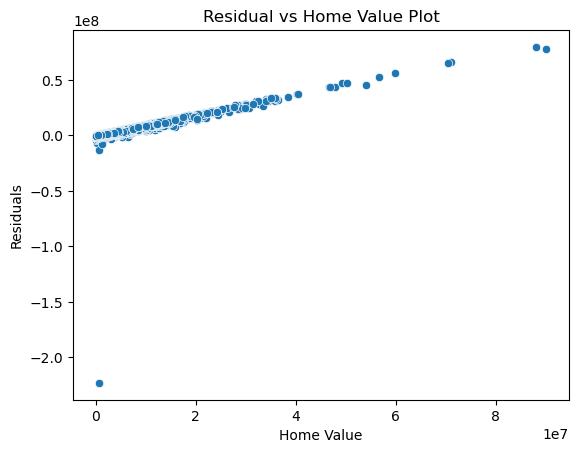

In [34]:
sns.scatterplot(data=train, x='tax_value',y='residuals')

plt.xlabel('Home Value')
plt.ylabel('Residuals')
plt.title('Residual vs Home Value Plot')
plt.show()

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



In [35]:
# # Mean squared error

MSE = mean_squared_error(train.tax_value, train.yhat)
# Sum of Squared Errors

SSE = MSE * len(train)
# Root Mean Squared Error

RMSE = MSE**.5

# # ESS Explained Sum of Squares
ESS = ((train.yhat - train.tax_value.mean())**2).sum()
# TSS Total Sum of Squares
TSS = ESS + SSE

print(f' MSE         : {MSE}')
print(f' SSE         : {SSE}')
print(f' RMSE        : {RMSE}')
print(f' TSS         : {TSS}')
print(f' ESS         : {ESS}')

 MSE         : 364188522153.5771
 SSE         : 4.364912336452489e+17
 RMSE        : 603480.3411492185
 TSS         : 5.481176914102753e+17
 ESS         : 1.1162645776502642e+17


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).



In [36]:
train['baseline'] = train.tax_value.mean()

In [37]:
MSE_baseline = mean_squared_error(train.tax_value, train.baseline)
print(f' MSE Baseline: {MSE_baseline}')

 MSE Baseline: 457324584353.91504


In [38]:
SSE_baseline = MSE_baseline * len(train)
print(f' SSE Baseline: {SSE_baseline}')

 SSE Baseline: 5.481176914102822e+17


In [39]:
RMSE_baseline = MSE_baseline**.5
print(f' RMSE Baseline: {RMSE_baseline}')

 RMSE Baseline: 676257.7795145244


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



In [40]:
if SSE < SSE_baseline:
    print('My model is better than baseline')
else:
    print('My model is worse than baseline')

My model is better than baseline


### 7. What is the amount of variance explained in your model?



In [42]:
R2 = ESS / TSS
# or 
r2_score(train.tax_value, train.yhat)
print(R2, r2_score(train.tax_value, train.yhat))

0.20365417776940925 0.2036541777694192


### 8. Is your model better than the baseline model?



In [43]:
RMSE_baseline - RMSE

72777.43836530589

### 9. Create a file named evaluate.py that contains the following functions.

* plot_residuals(y, yhat): creates a residual plot
* regression_errors(y, yhat): returns the following values:
    * sum of squared errors (SSE)
    * explained sum of squares (ESS)
    * total sum of squares (TSS)
    * mean squared error (MSE)
    * root mean squared error (RMSE)
* baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
* better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [45]:
def plot_residuals(y, yhat):
    residuals = y - yhat
    
    plt.scatter(x=y, y=residuals)
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')
    plt.show()

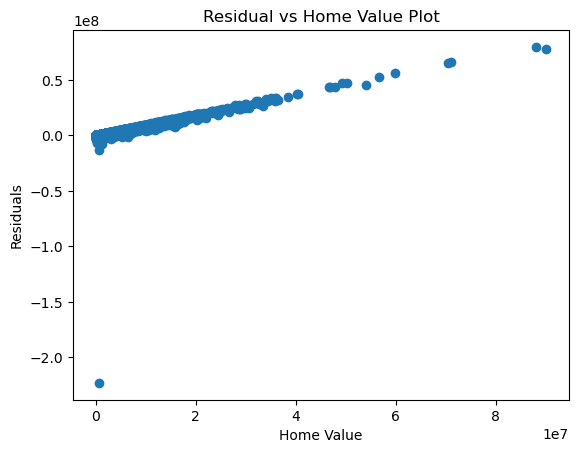

In [46]:
plot_residuals(train.tax_value, train.yhat)

In [47]:
def regression_errors(y, yhat):
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    ESS = ((yhat - y.mean())**2).sum()
    TSS = ESS + SSE
    
    return SSE, ESS, TSS, MSE, RMSE

In [48]:
regression_errors(train.tax_value, train.yhat)

(4.364912336452489e+17,
 1.1162645776502642e+17,
 5.481176914102753e+17,
 364188522153.5771,
 603480.3411492185)

In [49]:
def baseline_mean_errors(y):
    baseline = np.repeat(y.mean(), len(y))
    
    MSE = mean_squared_error(y, baseline)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    return SSE, MSE, RMSE

In [50]:
baseline_mean_errors(train.tax_value)

(5.481176914102822e+17, 457324584353.91504, 676257.7795145244)

In [51]:
def better_than_baseline(y, yhat):
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    
    if SSE < SSE_baseline:
        print('My OSL model performs better than baseline')
    else:
        print('My OSL model performs worse than baseline. :( )')

In [52]:
better_than_baseline(train.tax_value, train.yhat)

My OSL model performs better than baseline
